In [2]:
import os
import numpy as np
import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results2(path, n_folds):
    result = []
    with gzip.open(  path ,'rb') as f:
        for i in range(n_folds+1):

            try:
                data = pkl.load(f)

                result.append( data ) 
            except EOFError:

                break
    
    return np.array(result)

In [55]:
n_folds = 25
horizon = 9999
context = 'adult'
model = 'MLP'


material = {
    #'EEneuralcbpside_v5': {'color': [255, 255, 0], 'label': 'EEneuralcbpside_v5'},  # Red
    'EEneuralcbpside_v6': {'color': [255, 0, 0], 'label': 'EEneuralcbpside_v6'},  # Red
    'ineural6': {'color': [51, 255, 255], 'label':'IneurAL6'},                    # Yellow
    'ineural3': {'color': [0, 0, 255], 'label':'IneurAL3'},                    # Cyan
    'neuronal6': {'color': [255, 0, 255], 'label':'neuronal6'},                  # Magenta
    'neuronal3': {'color': [160, 160, 160], 'label':'neuronal3'},                   # Orange
    'margin': {'color': [160, 160, 160], 'label':'margin'},
    'cesa': {'color': [0, 0, 255], 'label':'cesa'},
}

#  'random':{'color':[204,0,204],'label':'e-greedy'}

fig = go.Figure( )

final_regrets = {}

for agent_name in material.keys():

    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    # print(agent_name)

    r,g,b = color

    try:
        direct = './results/'
        if l_label != 'EEneuralcbpside_v5':
            path = os.path.join(direct, 'case1_{}_{}_{}_{}_{}.pkl.gz'.format(model, context, horizon,n_folds,agent_name) )
        else:
            path = os.path.join(direct, 'case1_MNISTbinary_{}_{}_{}.pkl.gz'.format(horizon,n_folds,agent_name) )
        result = loadall_results2(path, n_folds)
        result = result[1:]
        result = result.astype(np.float32)
        print(result.shape)
    except:
        result = np.zeros((n_folds,horizon))


    final_regrets[l_label] = result[:,-1] 
    
    regret =  np.mean(result,0) 
    xcoords = np.arange(0,horizon,1).tolist()
    std =  np.std( result , 0 )
    upper_regret = regret + std


    fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'solid' ), mode='lines',  name=l_label,  showlegend=True )) # 
    fig.add_trace(   go.Scatter( x=xcoords+xcoords[::-1], y=upper_regret.tolist()+regret.tolist()[::-1],  fill='toself', fillcolor='rgba({}, {}, {},0.2)'.format(r,g,b), 
                            line=dict(color='rgba(255,255,255,0)'),   hoverinfo="skip",  showlegend=False )   )


    
fig.update_layout(autosize=False,
                  xaxis_title="Sequence", yaxis_title="Regret and Standard Dev.",  margin=go.layout.Margin( l=0,   r=0,   b=0,    t=0, ),   
                  font=dict(size=20,),
                  legend= dict(yanchor="top",y=0.98,xanchor="left",x=0.1) )

# fig.update_yaxes( type="log" )
# fig.update_xaxes( type="log" )

# fig.update_layout( yaxis=dict(range=[0, 2000] ) )

fig.show()
# fig.write_image("./figures/case1_{}_{}.pdf".format(model, context) )

(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)


In [3]:
n_folds = 25
horizon = 9999
model = 'MLP'


material = {
    #'EEneuralcbpside_v5': {'color': [255, 255, 0], 'label': 'EEneuralcbpside_v5'},  # Red
    'EEneuralcbpside_v6': {'color': [255, 0, 0], 'label': 'Neural-CBP'},  # Red
    'ineural6': {'color': [51, 255, 255], 'label':'IneurAL'},                    # Yellow
    # 'ineural3': {'color': [0, 0, 255], 'label':'IneurAL (tuned)'},                    # Cyan
    'neuronal6': {'color': [255, 0, 255], 'label':'Neuronal'},                  # Magenta
    # 'neuronal3': {'color': [160, 160, 160], 'label':'Neuronal (tuned)'},                   # Orange
    # 'margin': {'color': [160, 160, 160], 'label':'Margin'},
    # 'cesa': {'color': [0, 0, 255], 'label':'Cesa'},
}

#  'random':{'color':[204,0,204],'label':'e-greedy'}

fig = go.Figure( )


data_regrets = {}
for data in ['MNISTbinary', 'MagicTelescope', 'adult',  'MNIST', 'FASHION', 'covertype', 'shuttle',]: 

    if data in ['MNIST', 'FASHION']:
        case = 'case2' 
    elif data in ['covertype', 'shuttle']:
        case = 'game_case_seven'
    else:
        case = 'case1'
        
    final_regrets = {}
    for agent_name in material.keys():

        color, l_label = material[agent_name]['color'], material[agent_name]['label']

        r,g,b = color

        try:
            direct = './results/'
            path = os.path.join(direct, '{}_{}_{}_{}_{}_{}.pkl.gz'.format(case, model, data, horizon,n_folds,agent_name) )
            print(path)
            result = loadall_results2(path, n_folds)
            result = result[1:]
            result = result.astype(np.float32)
            print(result.shape)
            final_regrets[l_label] = result[:,-1] 
        except:
            result = np.zeros((n_folds,horizon))

    if data == 'MNISTbinary':
        data = 'MNIST binary (odd vs. even)'
    if data == 'FASHION':
        data = 'Fashion MNIST'
        
    data_regrets[data] = final_regrets
        



# fig.show()
# fig.write_image("./figures/case1_{}_{}.pdf".format(model, context) )

./results/case1_MLP_MNISTbinary_9999_25_EEneuralcbpside_v6.pkl.gz
(25, 9999)
./results/case1_MLP_MNISTbinary_9999_25_ineural6.pkl.gz
(25, 9999)
./results/case1_MLP_MNISTbinary_9999_25_neuronal6.pkl.gz
(25, 9999)
./results/case1_MLP_MagicTelescope_9999_25_EEneuralcbpside_v6.pkl.gz
(25, 9999)
./results/case1_MLP_MagicTelescope_9999_25_ineural6.pkl.gz
(25, 9999)
./results/case1_MLP_MagicTelescope_9999_25_neuronal6.pkl.gz
(25, 9999)
./results/case1_MLP_adult_9999_25_EEneuralcbpside_v6.pkl.gz
(25, 9999)
./results/case1_MLP_adult_9999_25_ineural6.pkl.gz
(25, 9999)
./results/case1_MLP_adult_9999_25_neuronal6.pkl.gz
(25, 9999)
./results/case2_MLP_MNIST_9999_25_EEneuralcbpside_v6.pkl.gz
(25, 9999)
./results/case2_MLP_MNIST_9999_25_ineural6.pkl.gz
(25, 9999)
./results/case2_MLP_MNIST_9999_25_neuronal6.pkl.gz
(25, 9999)
./results/case2_MLP_FASHION_9999_25_EEneuralcbpside_v6.pkl.gz
(25, 9999)
./results/case2_MLP_FASHION_9999_25_ineural6.pkl.gz
(25, 9999)
./results/case2_MLP_FASHION_9999_25_neurona

In [73]:
data_regrets

{'MNIST binary (odd vs. even)': {'Neural-CBP': array([1210., 1201., 1357., 1351., 1254., 1192., 1199., 1435., 1296.,
         1234., 1274., 1429., 1292., 1274., 1353., 1196., 1164., 1294.,
         1258., 1262., 1257., 1248., 1178., 1281., 1412.], dtype=float32),
  'IneurAL': array([3749., 4077., 3402., 3628., 3796., 3677., 3647., 3561., 3620.,
         4266., 3551., 3582., 3951., 3857., 3891., 3396., 3935., 3889.,
         3809., 4396., 3509., 3443., 3779., 3680., 4154.], dtype=float32),
  'IneurAL (tuned)': array([1461., 1562., 1544., 1535., 1494., 1417., 1676., 2469., 1506.,
         1515., 1514., 1481., 1435., 1492., 1597., 1592., 1434., 1704.,
         1492., 1600., 1473., 1442., 1504., 1571., 1560.], dtype=float32),
  'Neuronal': array([2176., 2183., 2187., 2228., 2238., 2196., 2187., 2162., 2241.,
         2166., 2197., 2181., 2202., 2164., 2154., 2159., 2174., 2192.,
         2173., 2174., 2211., 2202., 2215., 2248., 2137.], dtype=float32),
  'Neuronal (tuned)': array([1469., 1

In [4]:
import pandas as pd
# pd.DataFrame(data_regrets)
# data_regrets

data = []

# Iterate over the dictionary to extract data
for dataset, models in data_regrets.items():
    for model, values in models.items():
        for value in values:
            data.append([dataset, model, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Dataset', 'Model', 'Value'])

# Calculate mean and standard error for each group
grouped = df.groupby(['Dataset', 'Model'])
mean = grouped['Value'].mean().reset_index()
std_error = grouped['Value'].std() / np.sqrt(grouped['Value'].count())
std_error = std_error.reset_index()

# Merge the mean and standard error into a single DataFrame
result = pd.merge(mean, std_error, on=['Dataset', 'Model'])
result.rename(columns={'Value_x': 'Mean', 'Value_y': 'StdError'}, inplace=True)


In [85]:
df

Dataset             Model   Value
0     MNIST binary (odd vs. even)        Neural-CBP  1210.0
1     MNIST binary (odd vs. even)        Neural-CBP  1201.0
2     MNIST binary (odd vs. even)        Neural-CBP  1357.0
3     MNIST binary (odd vs. even)        Neural-CBP  1351.0
4     MNIST binary (odd vs. even)        Neural-CBP  1254.0
...                           ...               ...     ...
1020                      shuttle  Neuronal (tuned)  8459.0
1021                      shuttle  Neuronal (tuned)  2187.0
1022                      shuttle  Neuronal (tuned)  2211.0
1023                      shuttle  Neuronal (tuned)  2145.0
1024                      shuttle  Neuronal (tuned)  1386.0

[1025 rows x 3 columns]

In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Assuming df is your DataFrame and it has columns 'Dataset', 'Value', 'Model'


# Create an empty figure
fig = go.Figure()

# Add bars for each Model
models = result['Model'].unique()

# Sort models so that 'Neural-CBP' is first
models = sorted(models, key=lambda x: x != 'Neural-CBP')

for model in models:
    subset = result[result['Model'] == model]
    fig.add_trace(go.Bar(
        x=subset['Dataset'],
        y=subset['Mean'],
        name=model,
        error_y=dict(type='data', array=subset['StdError'], visible=True)
    ))

# Add vertical black lines between data groups

datasets = result['Dataset'].unique()
for i, dataset in enumerate(datasets[:-1]):
    fig.add_vline(x=i + 0.5, line_width=2, line_color="black")


size = 12
fig.update_layout(
    autosize=True, 
    barmode='group',
    margin=dict(l=20, r=20, t=20, b=20),  # Small margins
    xaxis=dict(
        tickfont=dict(size=size)  # Increase X-axis tick font size
    ),
    yaxis=dict(
        title="Final regret and standard deviation",
        title_font=dict(size=size),
        tickfont=dict(size=size)  # Increase Y-axis tick font size
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.15,  # Adjust this value to position the legend
        xanchor="center",
        x=0.5,
        font=dict(size=size)  # Increase legend font size
    )
)

fig.show()
# fig.write_image("./results_MLP.pdf" )

In [4]:
n_folds = 25
horizon = 9999
context = 'adult'
case = 'case1'

material = { 
            # 'EEneuralcbpside_v2':{'color':[255,0,0],'label': 'EEneuralcbpside_v2'},
            #  'EEneuralcbpside_v3':{'color':[0,255,0],'label': 'EEneuralcbpside_v3'},
             'EEneuralcbpside_v5': {'color': [0, 255, 255], 'label': 'EEneuralcbpside_v5'},
            #  'EEneuralcbpside_v4':{'color':[255,255,0],'label': 'EEneuralcbpside_v4'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,250],'label': 'Cesa'},
            'ineural6':{'color':[0,0,255],'label':'IneurAL6'},
            'ineural3':{'color':[0,0,155],'label':'IneurAL3'},
            'neuronal6':{'color':[255,0,255],'label':'neuronal6'},
            'neuronal3':{'color':[155,0,155],'label':'neuronal3'}  }

fig = go.Figure()

for agent_name in material.keys():
    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    r, g, b = color

    direct = './results/'
    path = os.path.join(direct, '{}_{}_{}_{}_{}.pkl.gz'.format(case, context, horizon, n_folds, agent_name))
    result = loadall_results2(path, n_folds)
    result = result[1:]
    result = result.astype(np.float32)

    # Plot each realization
    for realization in result:
        xcoords = np.arange(0, horizon, 1).tolist()
        fig.add_trace(go.Scatter(x=xcoords, y=realization, line=dict(color='rgb({},{},{})'.format(r, g, b)), mode='lines', name=l_label, showlegend=False))

    # Add a legend entry for the agent
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=l_label, line=dict(color='rgb({},{},{})'.format(r, g, b))))

fig.update_layout(autosize=False,
                  xaxis_title="Sequence",
                  yaxis_title="Regret",
                  margin=go.layout.Margin(l=0, r=0, b=0, t=0),
                  font=dict(size=20),
                  legend=dict(yanchor="top", y=0.98, xanchor="left", x=0.1))

# fig.show()
# fig.write_image("./figures/{}_splitview.pdf".format(case))

FileNotFoundError: [Errno 2] No such file or directory: './results/case1_adult_9999_25_EEneuralcbpside_v5.pkl.gz'

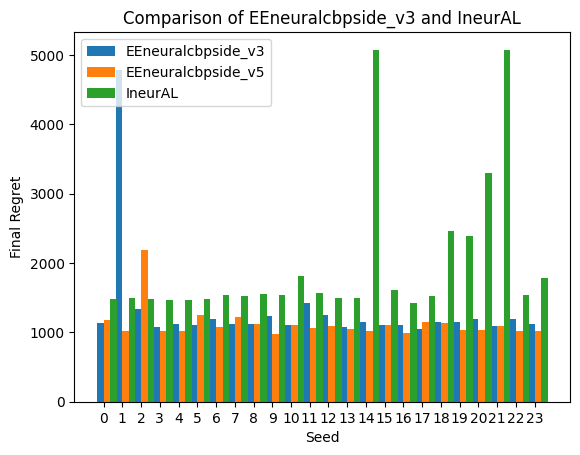

In [6]:
import matplotlib.pyplot as plt
# Creating a barchart

n_folds = 25
horizon = 9999
context = 'MNISTbinary'
case = 'case1'

material = { 
            # 'EEneuralcbpside_v2':{'color':[255,0,0],'label': 'EEneuralcbpside_v2'},
             'EEneuralcbpside_v3':{'color':[0,255,0],'label': 'EEneuralcbpside_v3'},
             'EEneuralcbpside_v5': {'color': [0, 255, 255], 'label': 'EEneuralcbpside_v5'},
            #  'EEneuralcbpside_v4':{'color':[255,255,0],'label': 'EEneuralcbpside_v4'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,250],'label': 'Cesa'},
             'ineural':{'color':[0,0,255],'label':'IneurAL'},
            'neuronal':{'color':[255,0,255],'label':'neuronal'}  }

final_regrets = {}

# Collect final regrets
for agent_name in material.keys():
    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    direct = './results/'
    path = os.path.join(direct, '{}_{}_{}_{}_{}.pkl.gz'.format(case, context, horizon, n_folds, agent_name))
    result = loadall_results2(path, n_folds)
    result = result[1:]
    result = result.astype(np.float32)

    # Store the final regret of each realization
    final_regrets[l_label] = result[:, -1]



bar_width = 0.35
index = np.arange(len(final_regrets['EEneuralcbpside_v3']))

fig, ax = plt.subplots()
bar1 = ax.bar(index, final_regrets['EEneuralcbpside_v3'], bar_width, label='EEneuralcbpside_v3')
bar2 = ax.bar(index + bar_width, final_regrets['EEneuralcbpside_v5'], bar_width, label='EEneuralcbpside_v5')
bar3 = ax.bar(index + 2* bar_width, final_regrets['IneurAL'], bar_width, label='IneurAL')

ax.set_xlabel('Seed')
ax.set_ylabel('Final Regret')
ax.set_title('Comparison of EEneuralcbpside_v3 and IneurAL')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(len(final_regrets['EEneuralcbpside_v3']))])
ax.legend()

# plt.show()
# plt.savefig('./figures/{}_barchart.pdf'.format(case), dpi=380, bbox_inches='tight')

In [70]:
n_folds = 25
horizon = 9999

context = 'shuttle'
model = 'MLP'

direct = './results/'
path = os.path.join(direct, 'game_case_seven_{}_{}_{}_{}_{}.pkl.gz'.format(model,context,horizon,n_folds,'neuronal3') )
result = loadall_results2(path, 20)
result

array([[None, None, None, ..., None, None, None]], dtype=object)